In [1]:
import librosa.display
import numpy as np

Load Audiodata

In [2]:
audioPath = "../../gan/rnn/stft_absolute/stftAbsolute2.wav"
#audioPath = "soundFiles/Test/test1.m4a"
    
audioData, sr = librosa.load(audioPath, sr=11025)
     
print(sr)
print(len(audioData)/sr)

11025
19.504761904761907


Get noise
- shorten noise to one second

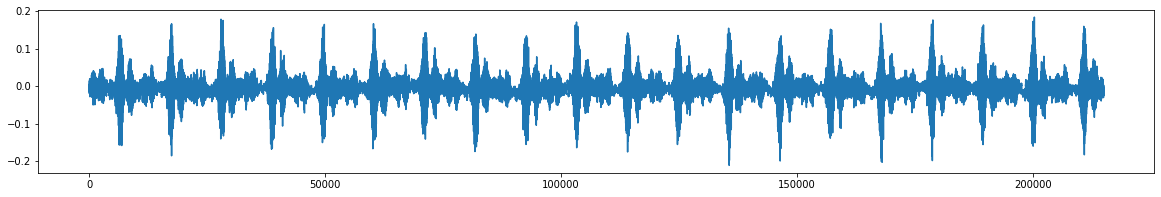

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(audioData)

Fourier-transform one second of noise

In [10]:
audioStft = librosa.stft(audioData[0:11025])

print(audioStft.shape)
print(audioStft[0])

(1025, 22)
[ -3.0193746+0.j  -2.1305656+0.j  -2.8690388+0.j  -6.0528383+0.j
  -5.2330074+0.j  -3.257936 +0.j  -4.6608996+0.j  -6.37031  +0.j
  -9.05182  +0.j -10.924572 +0.j -11.139801 +0.j -10.648917 +0.j
  -8.8425865+0.j  -7.594994 +0.j  -7.826374 +0.j  -8.41118  +0.j
  -6.221658 +0.j  -5.746305 +0.j  -9.442113 +0.j -10.998872 +0.j
 -10.681577 +0.j  -8.616607 +0.j]


Visualize the noise

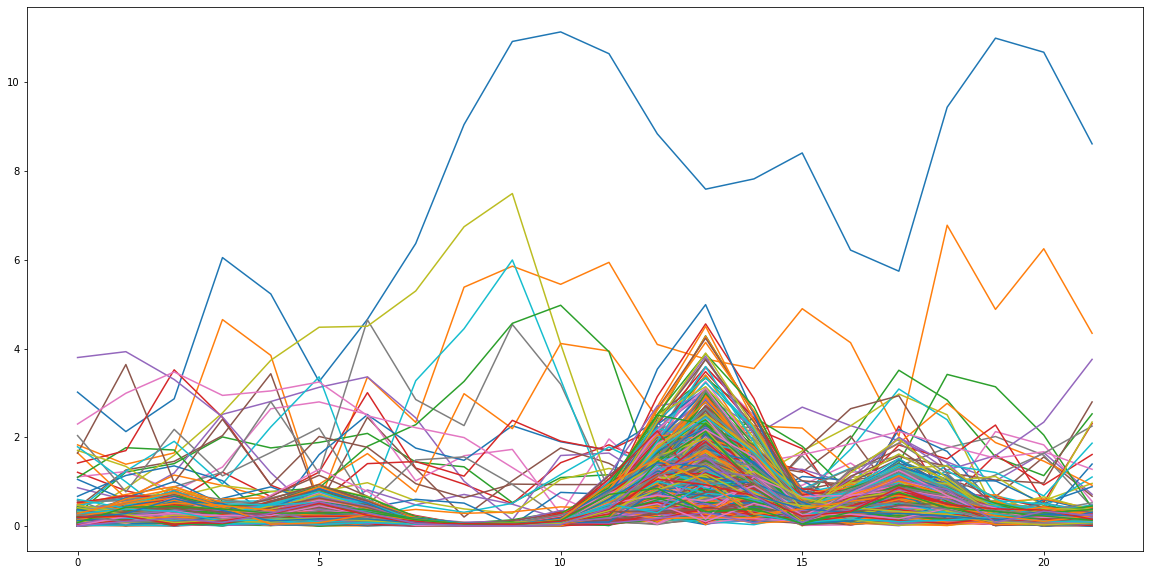

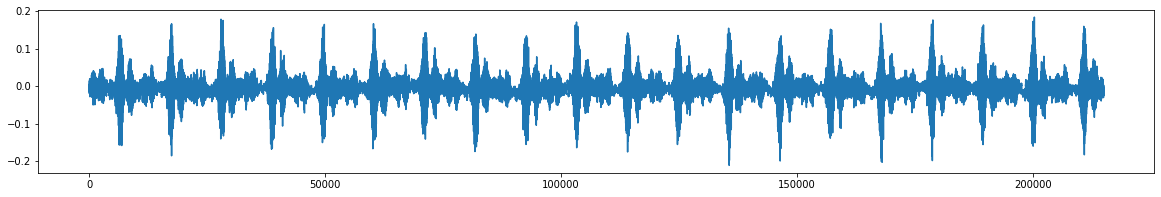

In [11]:
plt.figure(figsize=(20, 10))
for plot in audioStft:
    plt.plot(abs(plot))

plt.figure(figsize=(20, 3))
plt.plot(audioData)

1. Filter the noise by fourier-coefficients
- search and nullify relevant fourier-coefficients

2. Filter low values
- save as a file

In [12]:
print(len(audioStft))

1025


In [13]:
def filterFC(fcArray):
    fcArrayCopy = fcArray.copy()

    for i in range(len(fcArray)):
        subArray = fcArray[i]
        for j in range(len(subArray)):
            if abs(subArray[j]) <= 0.5:
                fcArrayCopy[i][j] = 0+0.j

    return(fcArrayCopy)

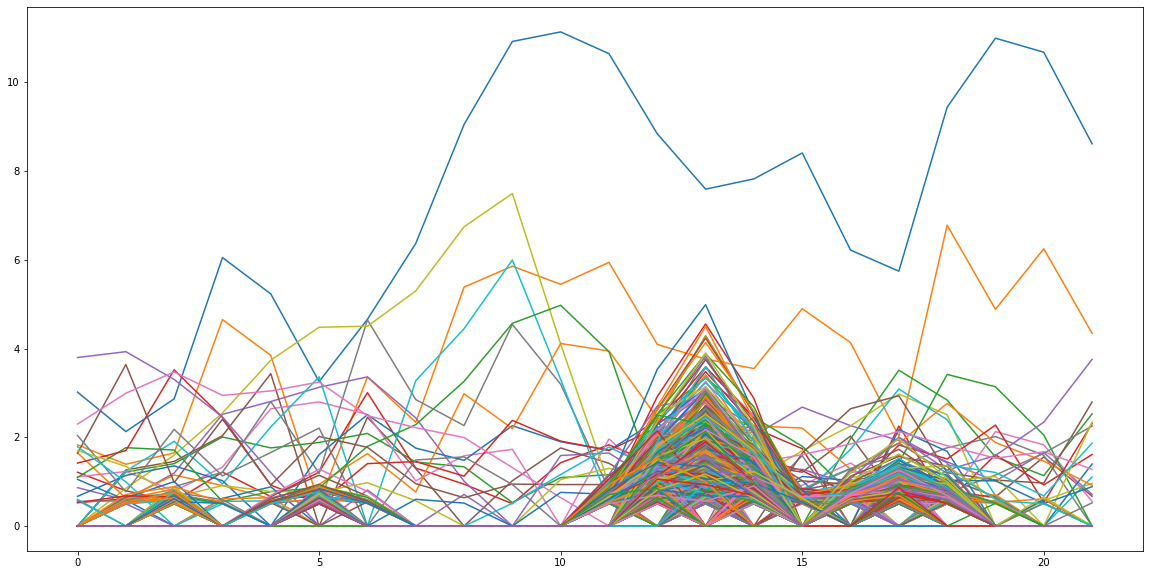

In [14]:
filteredFC = filterFC(audioStft)

plt.figure(figsize=(20, 10))
for plot in filteredFC:
    plt.plot(abs(plot))

Get sound from filtered FC

In [19]:
import soundfile as sf

filteredFCSound = librosa.istft(filteredFC)

print(filteredFCSound)

sf.write("../../gan/rnn/stft_absolute/stftAbsolute2filtered.wav", filteredFCSound, sr)

[-0.00521247 -0.00222623 -0.00542645 ...  0.00497888  0.00521424
  0.00407602]
